In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [14]:
df = pd.read_csv('DW.csv')
df = df.drop(['Unnamed: 0'], axis =1)
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


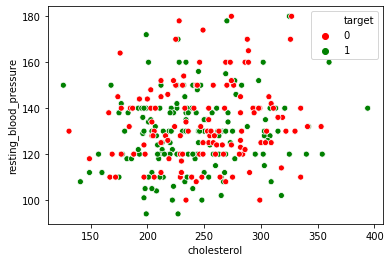

In [140]:
y ='resting_blood_pressure'
x ='cholesterol'
sns.scatterplot(x,y,data =df, hue='target',palette = ['red','green'])
#resting_blood_pressure

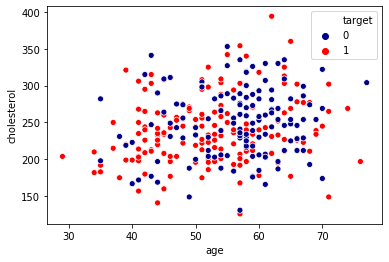

In [39]:
y ='cholesterol'
x ='age'
sns.scatterplot(x,y,data =df, hue='target',palette = ['DarkBlue','red'])

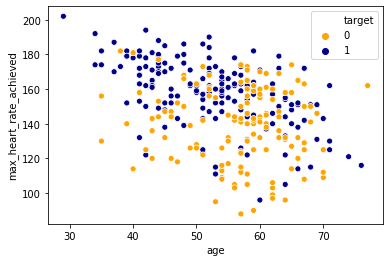

In [120]:
y='max_heart_rate_achieved'
x='age'
sns.scatterplot(x,y,data =df,hue='target',palette = ['Orange','DarkBlue']) 

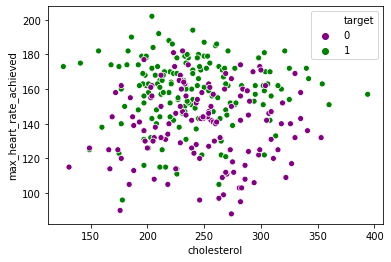

In [138]:
y ='max_heart_rate_achieved'
x ='cholesterol'
sns.scatterplot(x,y,data =df, hue='target',palette = ['purple','green'])

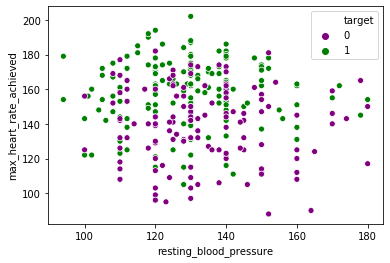

In [141]:
y ='max_heart_rate_achieved'
x ='resting_blood_pressure'
sns.scatterplot(x,y,data =df, hue='target',palette = ['purple','green'])

In [9]:
df['sex'].value_counts()

1    204
0     90
Name: sex, dtype: int64

In [130]:
b = df[(df['target'] ==0) & (df['thalassemia'] ==1)]
len(b)

12

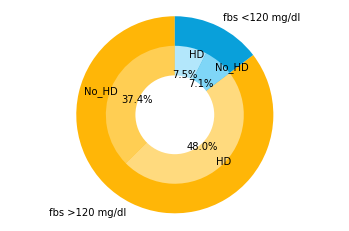

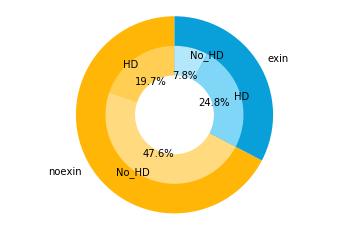

In [123]:
a = df[(df['target'] ==0) & (df['fasting_blood_sugar'] ==0)]
b = df[(df['target'] ==1) & (df['fasting_blood_sugar'] ==0)]
c = df[(df['target'] ==0) & (df['fasting_blood_sugar'] ==1)]
d = df[(df['target'] ==1) & (df['fasting_blood_sugar'] ==1)]

labels = ['fbs >120 mg/dl', 'fbs <120 mg/dl'] 
sizes = df['fasting_blood_sugar'].value_counts()
labels_sex = ['No_HD', 'HD','No_HD','HD']
sizes_sex = [len(a),len(b),len(c),len(d)]
colors = ['#FFB607', '#09A0DA']
colors_sex = ['#FFCE53', '#FFDA7E','#7FD6F7', '#B3E7FB']

plt.subplot(1,1,1)
bigger = plt.pie(sizes, labels=labels, colors=colors,
                 startangle=90, frame=True)
smaller = plt.pie(sizes_sex, labels=labels_sex,
                  colors=colors_sex, radius=0.7,
                  startangle=90, labeldistance=0.9,autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()
#------------------------------------------------------------------------------------------
a = df[(df['target'] ==0) & (df['exercise_induced_angina'] ==0)]
b = df[(df['target'] ==1) & (df['exercise_induced_angina'] ==0)]
c = df[(df['target'] ==0) & (df['exercise_induced_angina'] ==1)]
d = df[(df['target'] ==1) & (df['exercise_induced_angina'] ==1)]

labels = ['noexin', 'exin'] 
sizes = df['exercise_induced_angina'].value_counts()
labels_sex = ['HD', 'No_HD','HD','No_HD']
sizes_sex = [len(a),len(b),len(c),len(d)]
colors = ['#FFB607', '#09A0DA']
colors_sex = ['#FFCE53', '#FFDA7E','#7FD6F7', '#B3E7FB']

plt.subplot(1,1,1)
bigger = plt.pie(sizes, labels=labels, colors=colors,
                 startangle=90, frame=True)
smaller = plt.pie(sizes_sex, labels=labels_sex,
                  colors=colors_sex, radius=0.7,
                  startangle=90, labeldistance=0.9,autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()


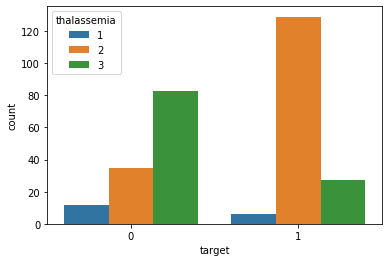

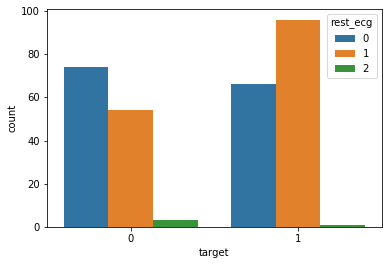

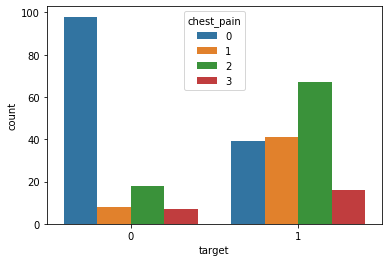

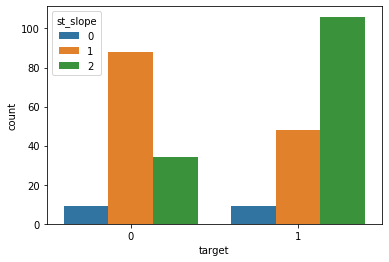

In [142]:
df2 = df[['sex','target','rest_ecg','thalassemia']]
df2 = df2[df2.thalassemia !=0]
ax = sns.countplot(x="target", hue="thalassemia", data=df2)
plt.show()

ay = sns.countplot(x="target", hue="rest_ecg", data=df)
plt.show()

ay = sns.countplot(x="target", hue="chest_pain", data=df)
plt.show()

ay = sns.countplot(x="target", hue="st_slope", data=df)
plt.show()